In [1]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from specim.specfuncs import spec1d

## The following is the part of the spectrum I am going to use for fit that would be reported. We decided to exclude parts blueward of H-eta line, also exclude H-delta line as it is within A-band but include H-beta line as that's what favored by the tests. For more check the 'J0818_veldis_test_final' notebook.

## First I only masked region around A band. Later decided to mask lots of sharp lines as they make the velocity dispersions over degree more stable. So mask_reg_new is the one we are finally using. Also included G-band in the blue side. So recalculating the systematic uncertainty.

In [2]:
spec = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[5350, 12000]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7121.92
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.31




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta        4861.00       9070.63



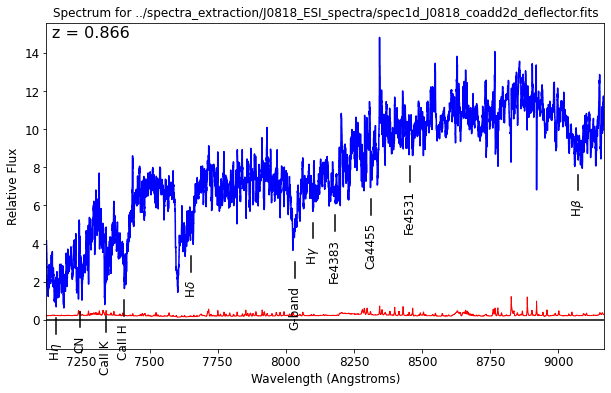

In [3]:
fg = plt.figure(figsize=(10,6))
spec.smooth(11, fig=fg)
spec.mark_lines('abs', z=0.866, usesmooth=True)
#spec.mark_lines('em', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389929 km/s


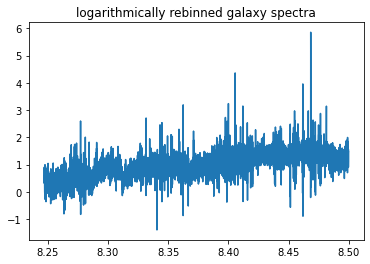

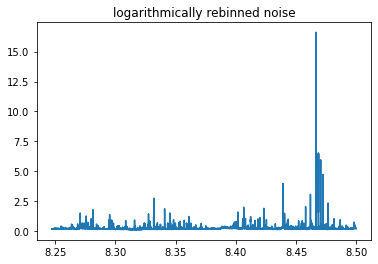

In [4]:
spec.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=250, noise_scale=0.2)

In [5]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -28980.159693 

sigma_diff : 0.989778


In [245]:
mask_reg = np.log(np.array([(7570, 7700)])/1.866)
mask_reg_new = np.log(np.array([(7238, 7241), (7339, 7342), (7367, 7370), (7432, 7445),(7565, 7730), 
                                (7749, 7752), (7819, 7822), (7990, 7995), 
                                (8285, 8290), (8297, 8300), (8335, 8355), (8396, 8400),
                                (8729, 8739), (8762, 8772), (8823, 8829), (8883, 8888),
                                (8916, 8922)])/1.866) #(8192, 8213), (7745, 7755),
#(7747, 7753), (7817, 7825), (7888, 7893), (7990, 7995), (8024, 8028), (8058, 8066),(7356.5, 7357.5),
# (7312, 7317), (7251, 7254), (7302, 7305), (8024, 8027), (8060, 8063),


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       121       378
chi2/DOF: 1.434; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       109       375
chi2/DOF: 1.433; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       112       377
chi2/DOF: 1.433; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       117       381
chi2/DOF: 1.433; degree = 7; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

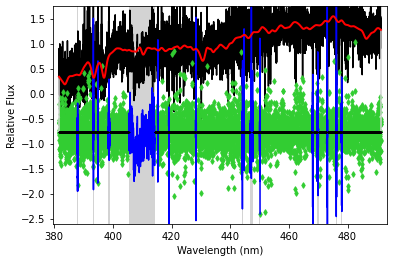

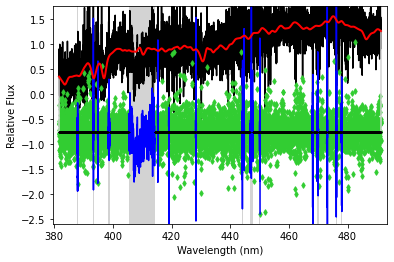

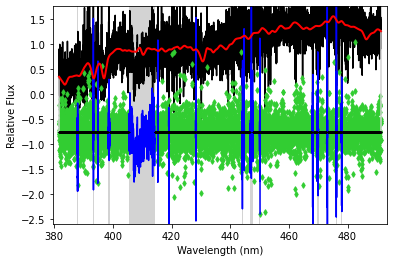

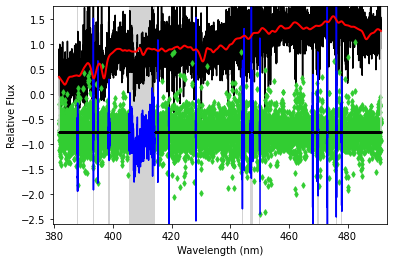

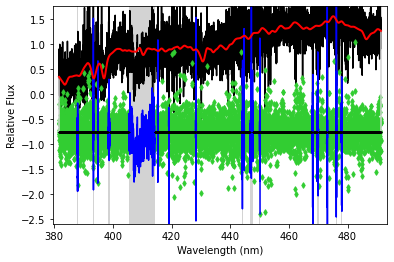

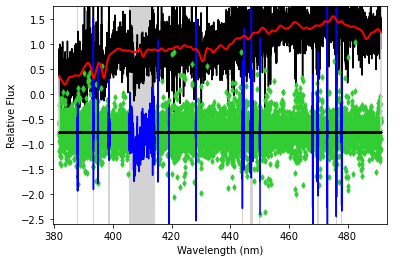

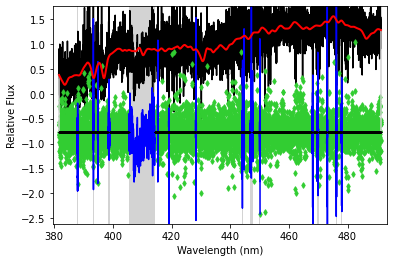

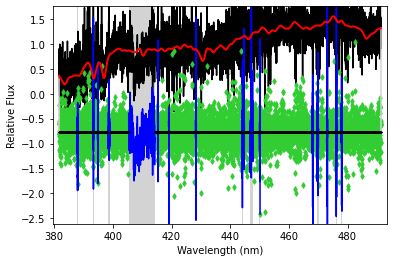

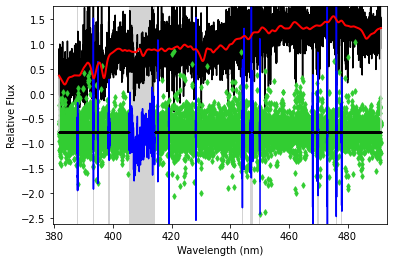

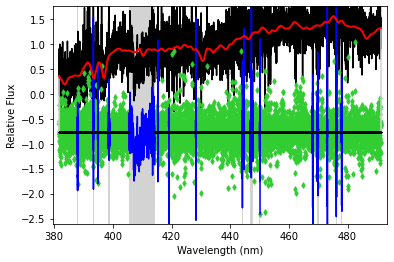

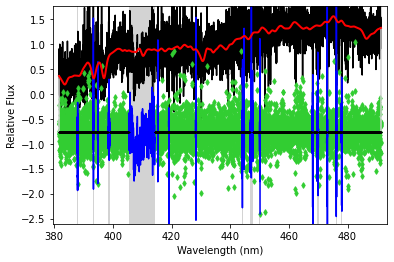

<Figure size 432x288 with 0 Axes>

In [246]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg_new, show_weight=True, moments=2)

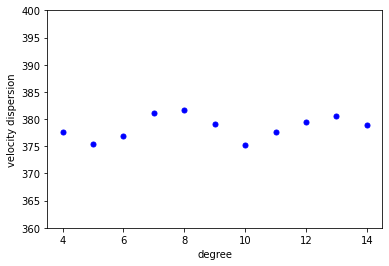

In [247]:
spec.plot_veldis(ylim=[360, 400])


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       110       386
chi2/DOF: 1.497; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       100       383
chi2/DOF: 1.497; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       115       391
chi2/DOF: 1.497; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:        97       387
chi2/DOF: 1.497; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

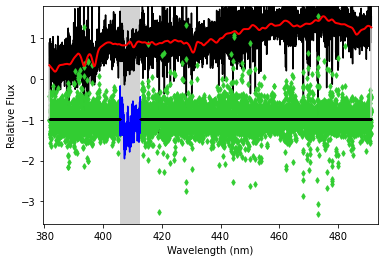

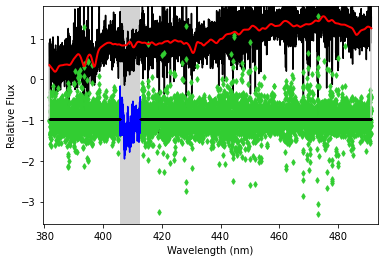

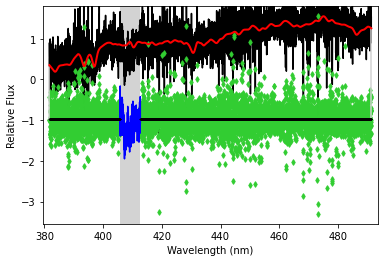

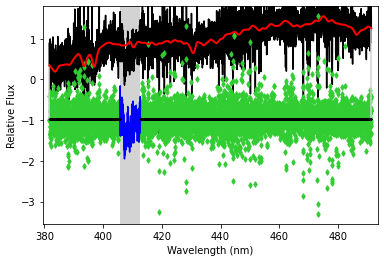

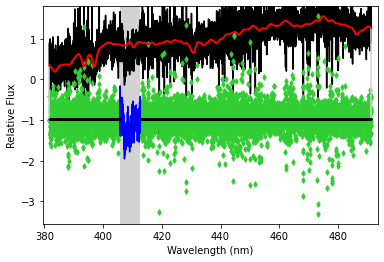

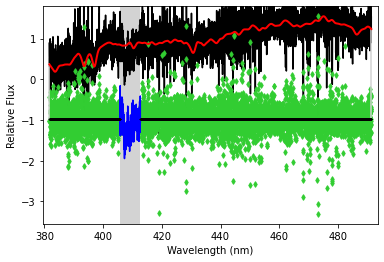

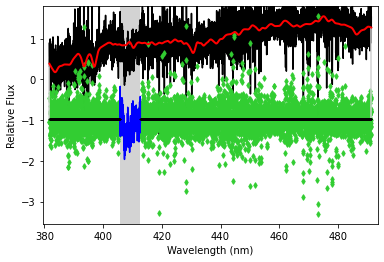

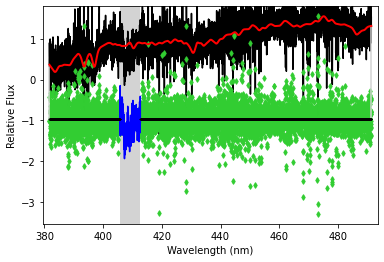

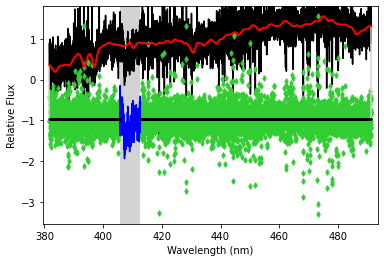

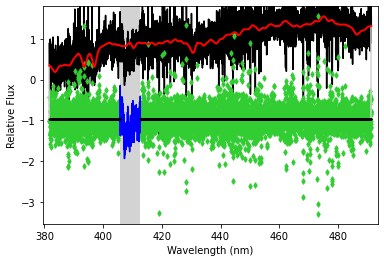

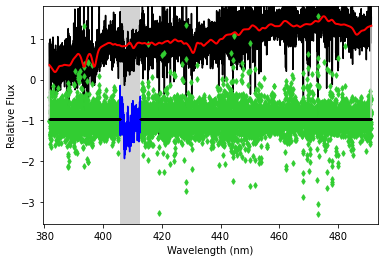

<Figure size 432x288 with 0 Axes>

In [74]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg, show_weight=True, moments=2)

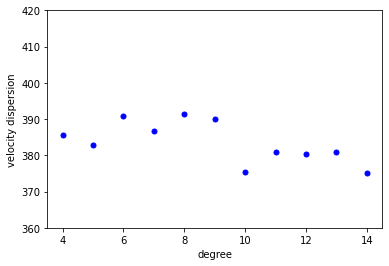

In [75]:
spec.plot_veldis(ylim=[360, 420])

In [58]:
mask_reg1 = np.log(np.array([(7570, 7650)])/1.866) #including H-delta line


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       106       358
chi2/DOF: 1.498; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        96       365
chi2/DOF: 1.498; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:        96       365
chi2/DOF: 1.498; degree = 6; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1268

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:       100       371
chi2/DOF: 1.497; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       

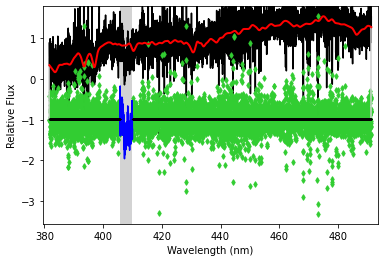

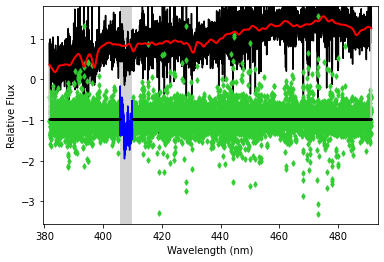

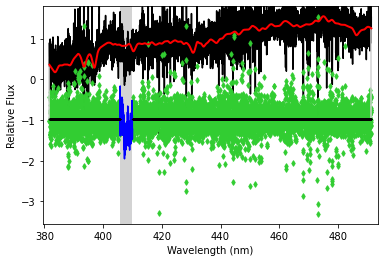

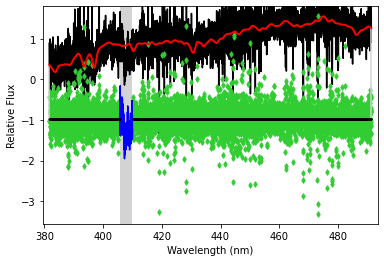

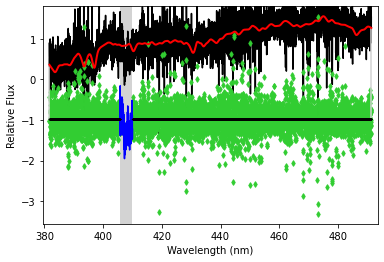

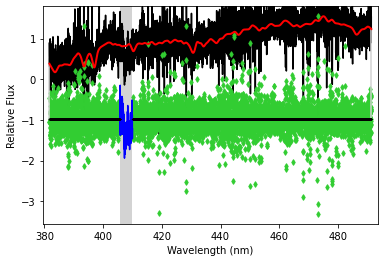

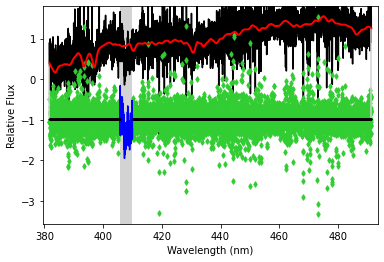

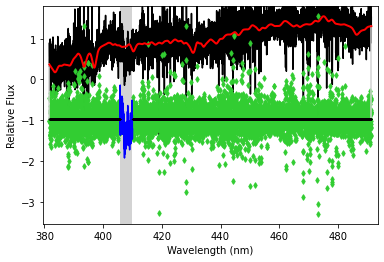

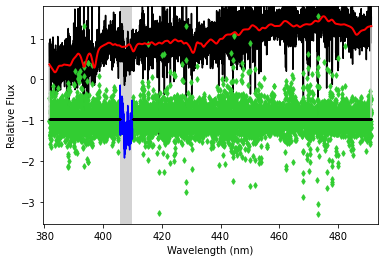

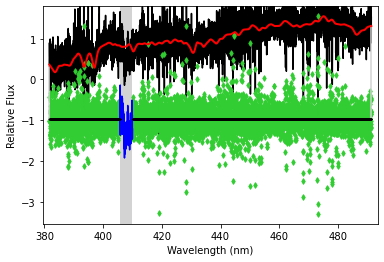

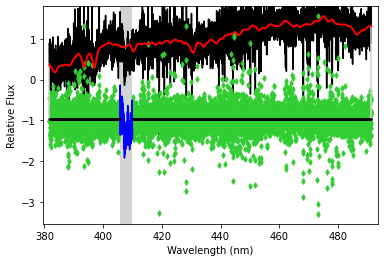

<Figure size 432x288 with 0 Axes>

In [59]:
# Including H-delta line
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 15], mask_reg=mask_reg1, show_weight=True, moments=2)

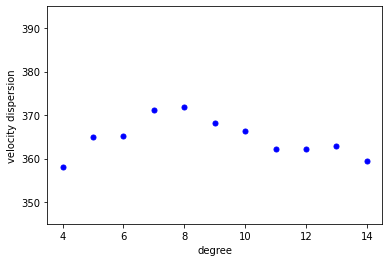

In [61]:
spec.plot_veldis(ylim=[345, 395])

order : 10


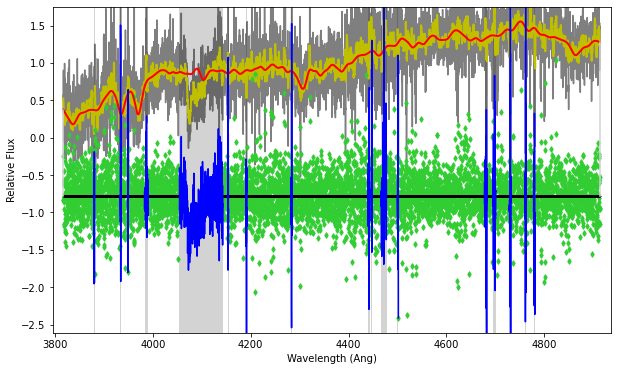

In [248]:
ord_list = np.array([10])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Blue side

In [92]:
spec_b = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[5350, 8430]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7121.92
 Spectrum End:     8005.72
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47



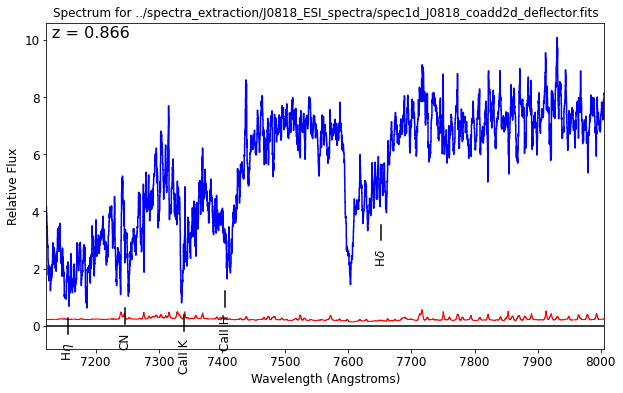

In [93]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(11, fig=fg)
spec_b.mark_lines('abs', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389920 km/s


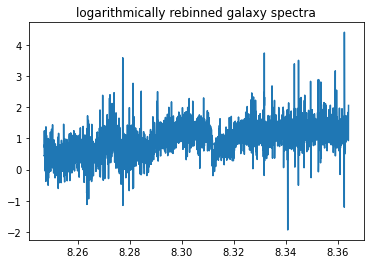

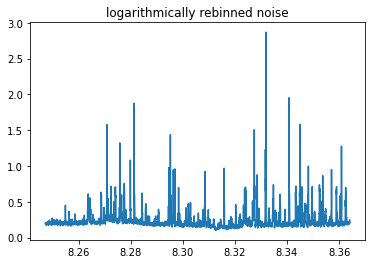

In [94]:
spec_b.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=200, noise_scale=0.2)

In [95]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -28980.159693 

sigma_diff : 0.989778



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       161       408
chi2/DOF: 2.852; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       167       410
chi2/DOF: 2.852; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       170       411
chi2/DOF: 2.852; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  11 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       172       415
chi2/DOF: 2.852; degree = 5; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  10 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

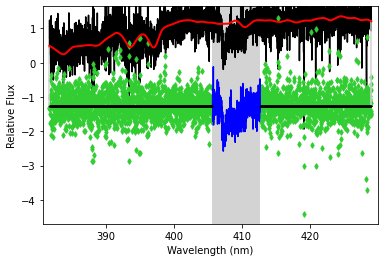

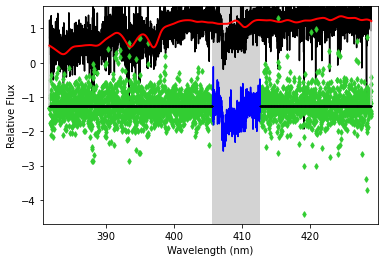

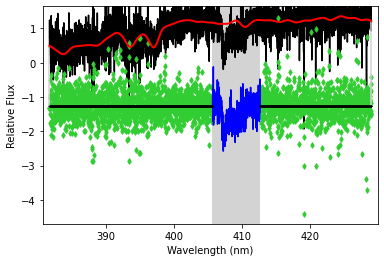

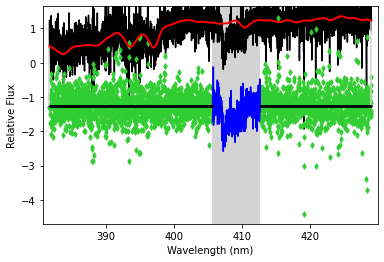

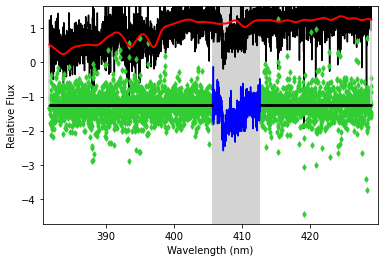

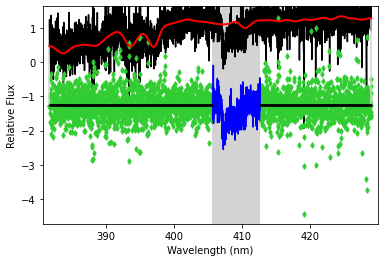

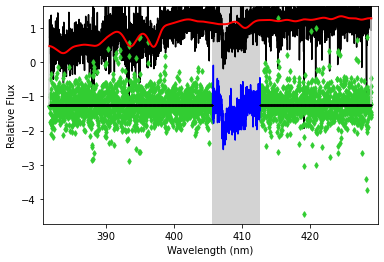

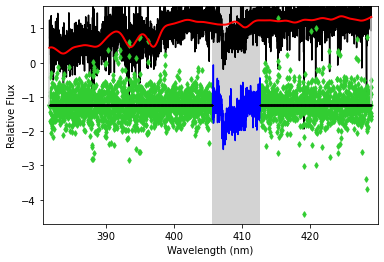

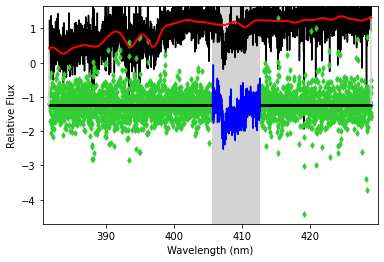

<Figure size 432x288 with 0 Axes>

In [76]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

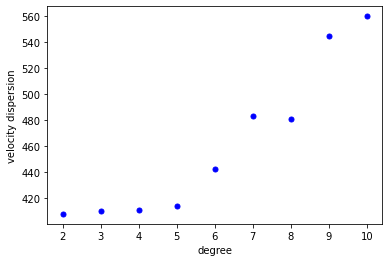

In [77]:
spec_b.plot_veldis()

order : 6


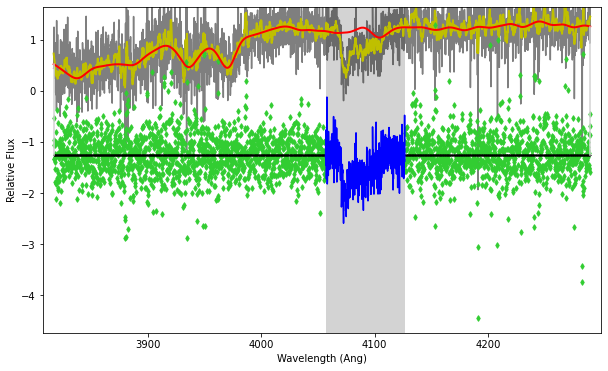

order : 10


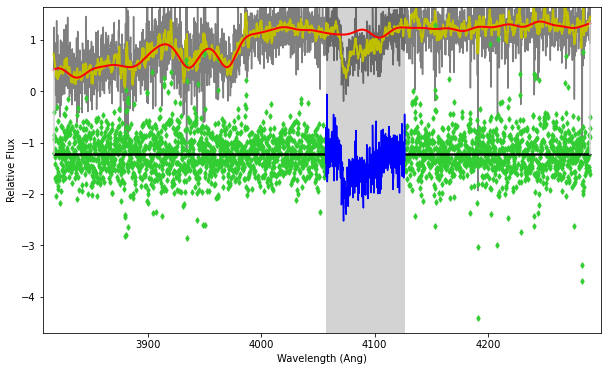

In [79]:
ord_list = np.array([6, 10])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_b.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()

## Included G-band in the blue side. This makes things more stable once using blue side.

In [108]:
spec_b = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[5350, 8700]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7121.92
 Spectrum End:     8088.27
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-eta         3835.00       7156.11
CN bandhd     3883.00       7245.68
CaII K        3933.67       7340.23
CaII H        3968.47       7405.17
H-delta       4101.00       7652.47
G-band        4305.00       8033.13



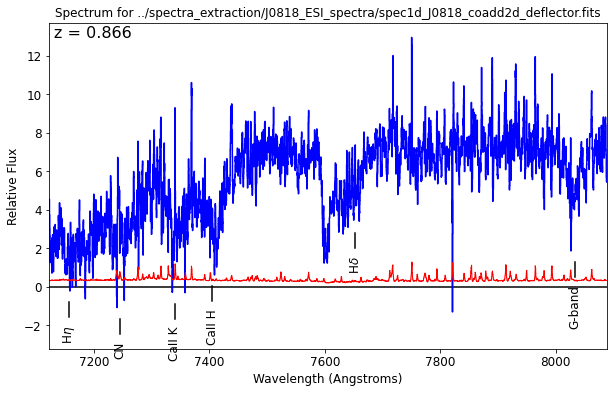

In [118]:
fg = plt.figure(figsize=(10,6))
spec_b.smooth(5, fig=fg)
spec_b.mark_lines('abs', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389920 km/s


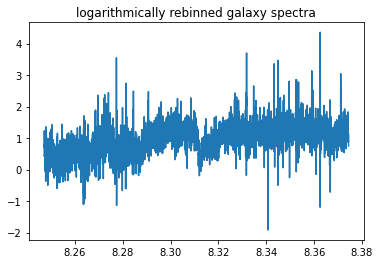

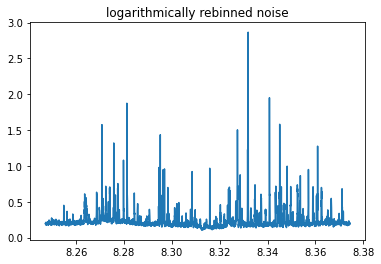

In [110]:
spec_b.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=200, noise_scale=0.2)

In [111]:
temp_spec_b = spec_b.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -28980.159693 

sigma_diff : 0.989778



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       120       388
chi2/DOF: 2.692; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       121       389
chi2/DOF: 2.692; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       121       388
chi2/DOF: 2.692; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       138       398
chi2/DOF: 2.692; degree = 5; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 17; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

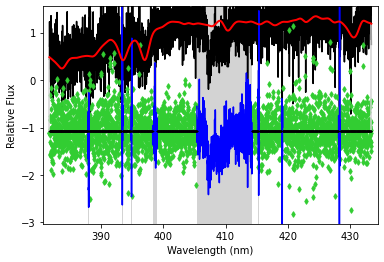

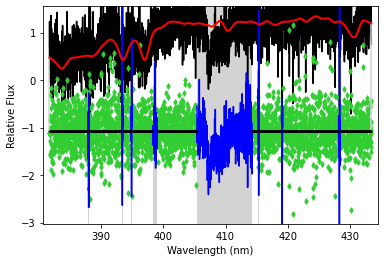

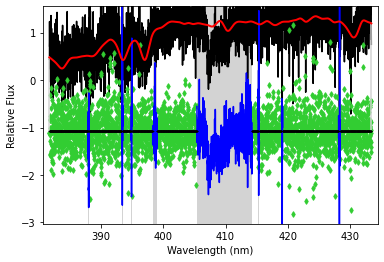

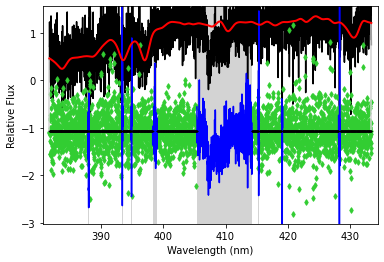

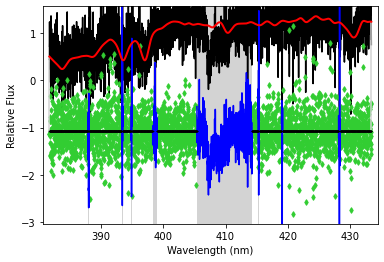

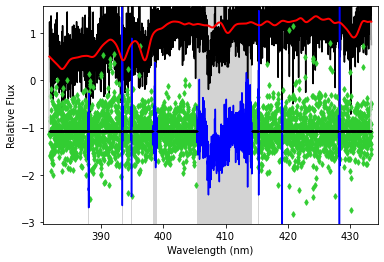

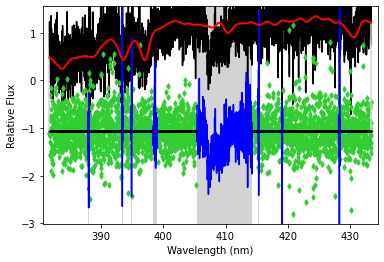

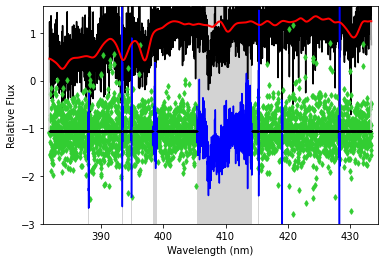

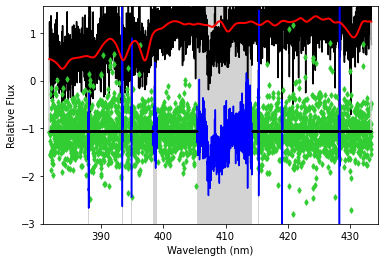

<Figure size 432x288 with 0 Axes>

In [249]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg_new, show_weight=True,
                  moments=2)

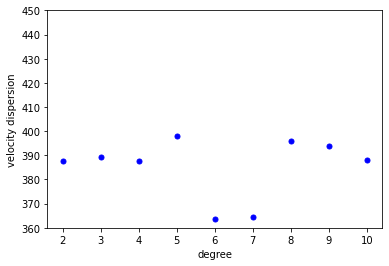

In [250]:
spec_b.plot_veldis(ylim=[360, 450])

In [54]:
mask_reg_b = np.log(np.array([(7570, 7650)])/1.866) #(7435, 7443),


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:       117       363
chi2/DOF: 2.839; degree = 2; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:       112       364
chi2/DOF: 2.839; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1268

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:       117       369
chi2/DOF: 2.839; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:       111       359
chi2/DOF: 2.839; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1268

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

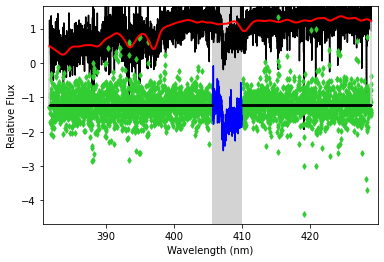

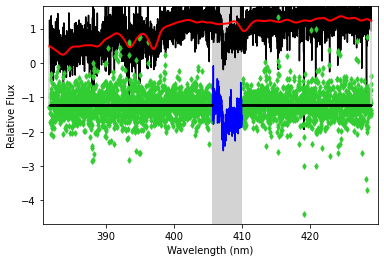

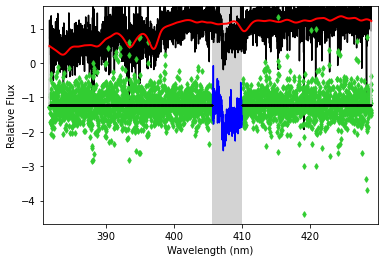

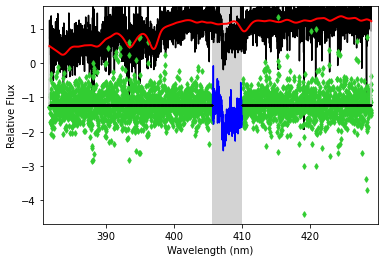

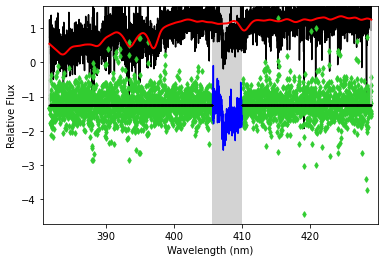

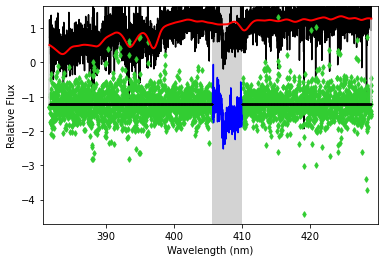

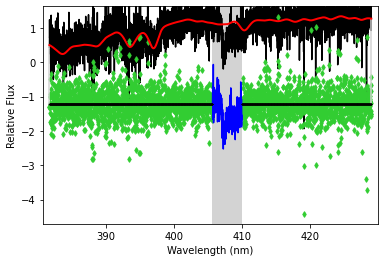

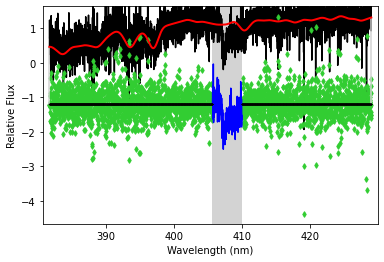

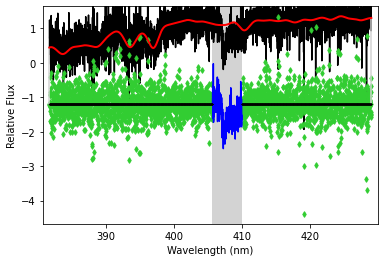

<Figure size 432x288 with 0 Axes>

In [55]:
spec_b.cal_veldis(temp_spec=temp_spec_b, degree=[2, 11], mask_reg=mask_reg_b, show_weight=True, moments=2)

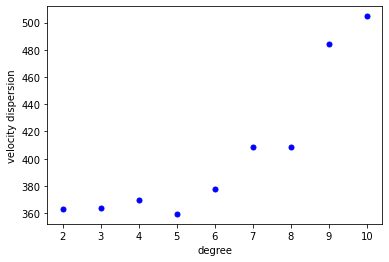

In [62]:
spec_b.plot_veldis()

## Red side

In [96]:
spec_r = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[8201, 12000]) #13600, [4130, 12200]


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7936.67
 Spectrum End:     9168.65
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.32




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85
H-beta        4861.00       9070.63



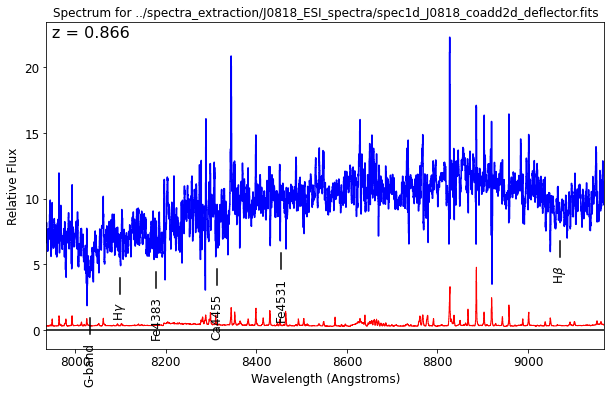

In [117]:
fg = plt.figure(figsize=(10,6))
spec_r.smooth(5, fig=fg)
spec_r.mark_lines('abs', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389922 km/s


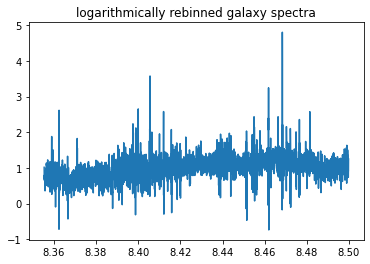

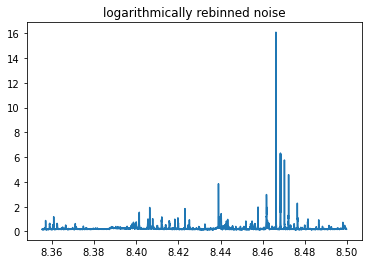

In [98]:
spec_r.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=200, noise_scale=0.2)

In [99]:
temp_spec_r = spec_r.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)# temp_num=500,


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -61452.796350 

sigma_diff : 0.989778



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        60       379
chi2/DOF: 0.9565; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        50       356
chi2/DOF: 0.9531; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        50       359
chi2/DOF: 0.9531; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        55       329
chi2/DOF: 0.9531; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:   

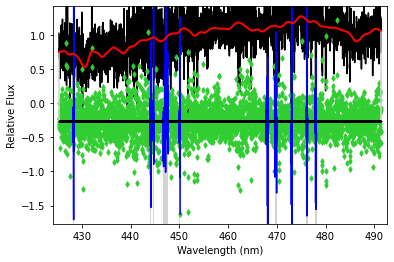

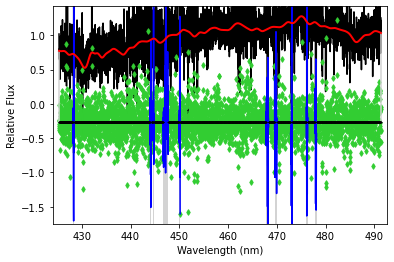

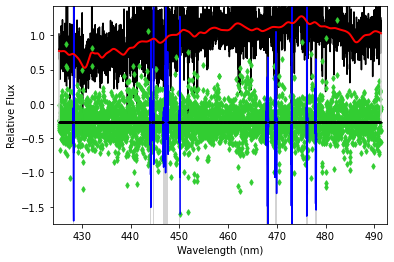

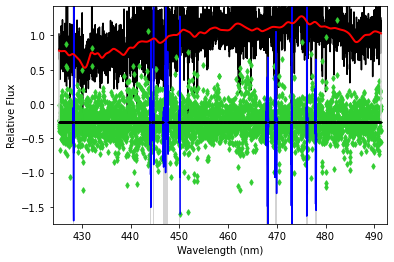

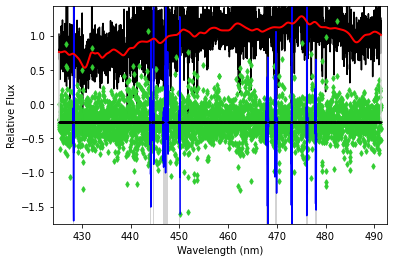

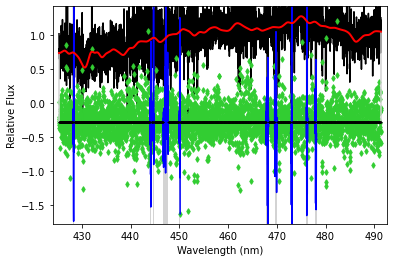

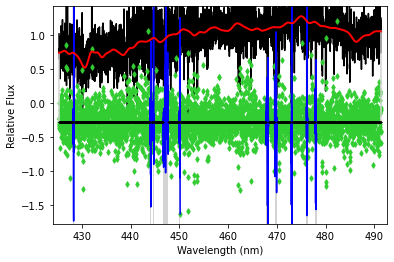

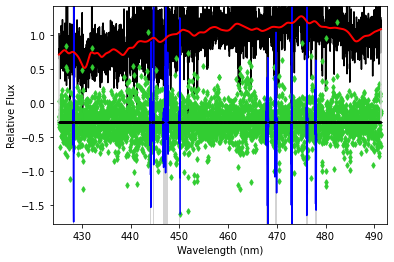

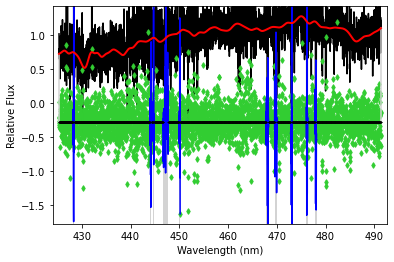

<Figure size 432x288 with 0 Axes>

In [251]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg_new, show_weight=True,
                  moments=2)

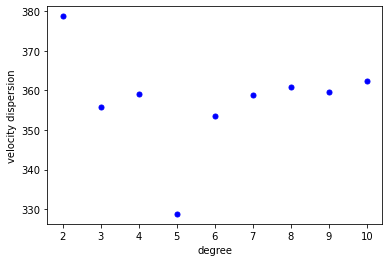

In [252]:
spec_r.plot_veldis()

order : 6


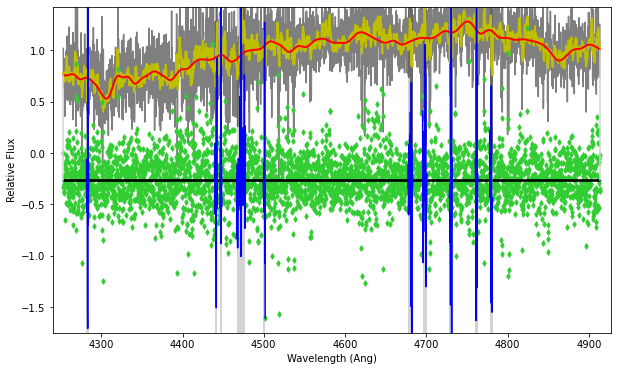

In [253]:
ord_list = np.array([6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec_r.plot_fit(order=od, boxsize=11, fig=fg)
    print('order : %d' %od)
    plt.show()


degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        63       364
chi2/DOF: 1.010; degree = 2; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        59       336
chi2/DOF: 1.007; degree = 3; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        69       338
chi2/DOF: 1.007; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  14 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        72       323
chi2/DOF: 1.007; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  15 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

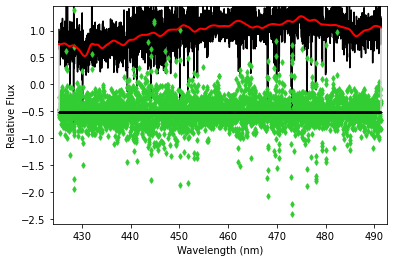

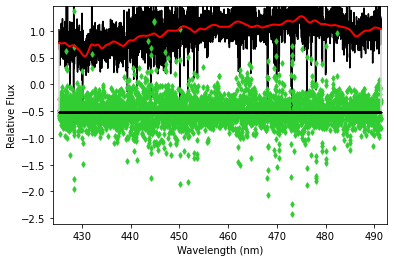

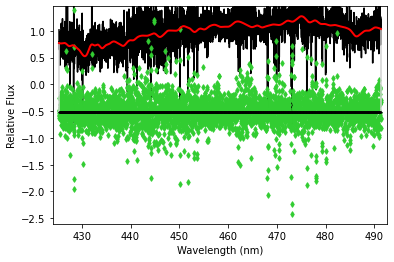

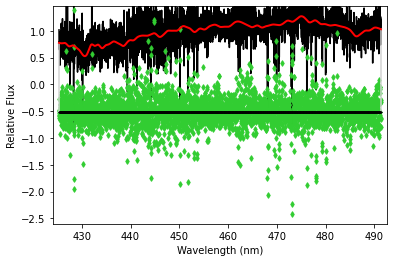

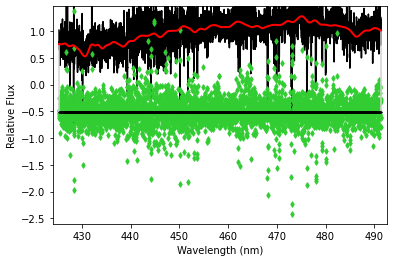

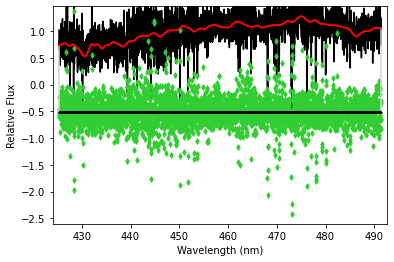

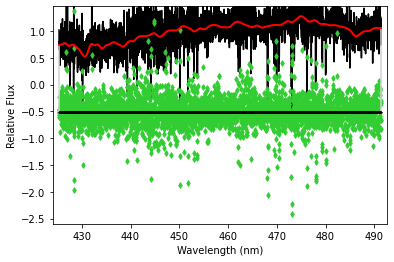

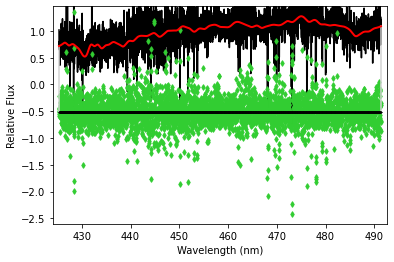

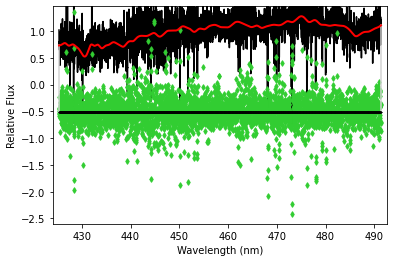

<Figure size 432x288 with 0 Axes>

In [69]:
spec_r.cal_veldis(temp_spec=temp_spec_r, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

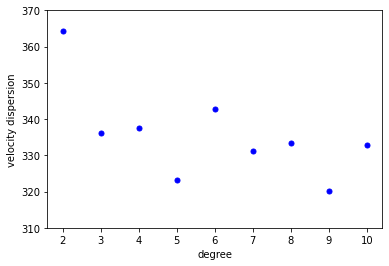

In [72]:
spec_r.plot_veldis(ylim=[310, 370])

## Results

## Systematic uncertainty

### Systematic uncertainty is calculated by changing wavelength range used to fit for velocity dispersion, degree of additive polynomial and template set. There are three choice for wavelength range- full spectrum, blue side and red side. There is some overlaping between blue side and red side.

In [255]:
veldis_array = []
discard_veldis = []

## New estimate with  mask_reg_new and new blue side.

In [256]:
## full spectrum

addtive_deg_full = np.arange(4, 14)

for d in addtive_deg_full:
    for i in range(10):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg_new, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])

print(len(veldis_array), len(discard_veldis))

## blue side
addtive_deg_b = np.arange(2, 10)

for d in addtive_deg_b:
    for i in range(13):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg_new, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))

## red side
addtive_deg_r = np.arange(2, 10)

for d in addtive_deg_r:
    for i in range(13):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg_new, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])
            
print(len(veldis_array), len(discard_veldis))


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 11

degree : 12

degree

(array([ 2.,  3.,  6., 19., 20., 25., 26., 27., 39., 42., 28., 30., 17.,
        11.,  4.,  3.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([327.09287191, 332.95233176, 338.81179161, 344.67125147,
        350.53071132, 356.39017117, 362.24963102, 368.10909087,
        373.96855073, 379.82801058, 385.68747043, 391.54693028,
        397.40639013, 403.26584999, 409.12530984, 414.98476969,
        420.84422954, 426.70368939, 432.56314924, 438.4226091 ,
        444.28206895, 450.1415288 , 456.00098865, 461.8604485 ,
        467.71990836, 473.57936821]),
 <BarContainer object of 25 artists>)

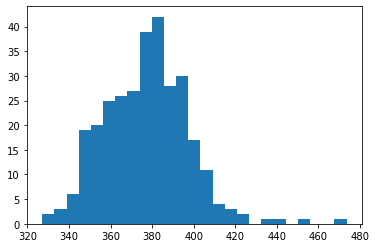

In [257]:
plt.hist(veldis_array, bins=25)

In [258]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 20 km/s
systematic uncertainty for sample : 20 km/s


In [259]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 377 km/s


In [260]:
np.savetxt('J0818_systematic_veldis_new.txt', np.array(veldis_array), fmt='%f')


degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       116       382
chi2/DOF: 1.433; degree = 8; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267


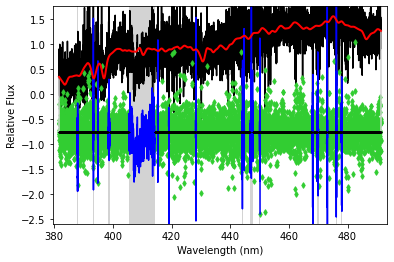

<Figure size 432x288 with 0 Axes>

In [262]:
spec.cal_veldis(temp_spec=temp_spec, degree=[8, 9], mask_reg=mask_reg_new, show_weight=True, moments=2)

In [263]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('J0818_bestfit_veldis_new.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

## The following is the uncertainty calculated using mask_reg and blue side without G-band.

In [81]:
## full spectrum

addtive_deg_full = np.arange(4, 14)

for d in addtive_deg_full:
    for i in range(12):
        temp_choice = np.random.choice(temp_spec.shape[1], size=600, replace=False)
        spec.cal_veldis(temp_spec=temp_spec[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec.vel_dis[0])
        else:
            veldis_array.append(spec.vel_dis[0])


degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 8

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 9

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degree : 10

degre

In [85]:
## blue side
addtive_deg_b = np.arange(2, 7)

for d in addtive_deg_b:
    for i in range(16):
        temp_choice = np.random.choice(temp_spec_b.shape[1], size=600, replace=False)
        spec_b.cal_veldis(temp_spec=temp_spec_b[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_b.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_b.vel_dis[0])
        else:
            veldis_array.append(spec_b.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6


In [90]:
## red side
addtive_deg_r = np.arange(2, 9)

for d in addtive_deg_r:
    for i in range(15):
        temp_choice = np.random.choice(temp_spec_r.shape[1], size=600, replace=False)
        spec_r.cal_veldis(temp_spec=temp_spec_r[:, temp_choice], degree=[d, d+1], mask_reg=mask_reg, 
                        show_weight=True, moments=2, plot=False, quiet=True)
        if np.sum(np.array(spec_r.temp_weight[0]) > 10) > 0:
            discard_veldis.append(spec_r.vel_dis[0])
        else:
            veldis_array.append(spec_r.vel_dis[0])


degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 2

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 3

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 4

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 5

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 6

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

degree : 7

deg

305

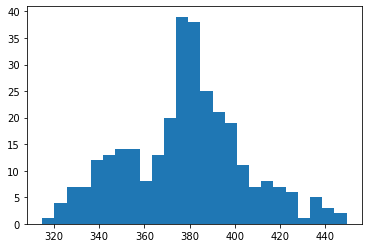

In [100]:
plt.hist(veldis_array, bins=25)
len(veldis_array)

In [92]:
print('systematic uncertainty for population : %d km/s' % int(np.std(veldis_array)))
print('systematic uncertainty for sample : %d km/s' % int(np.std(veldis_array, ddof=1)))

systematic uncertainty for population : 26 km/s
systematic uncertainty for sample : 26 km/s


In [94]:
np.savetxt('J0818_systematic_veldis.txt', np.array(veldis_array), fmt='%f')

In [95]:
print('mean velocity dispersion : %d km/s' % int(np.mean(veldis_array)))

mean velocity dispersion : 378 km/s


## The velocity dispersion value that to be reported is measured using all templates and additive polynomial with degree 8. The degree of the polynomial is decided based on the length of the spectrum which in this case around 2047 Ang.


degree : 8
 Best Fit:       Vel     sigma
 comp.  0:       114       391
chi2/DOF: 1.497; degree = 8; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  18 / 1268


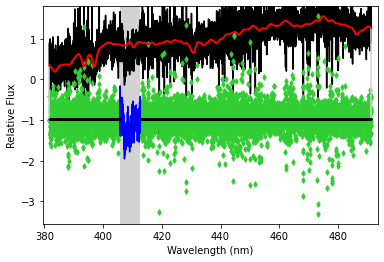

<Figure size 432x288 with 0 Axes>

In [101]:
spec.cal_veldis(temp_spec=temp_spec, degree=[8, 9], mask_reg=mask_reg, show_weight=True, moments=2)

## store best fit data and good pixel values for future use

In [102]:
gdpix = np.pad(spec.goodpixels[0], (0, len(spec.best_fit[0])- len(spec.goodpixels[0])))
np.savetxt('J0818_bestfit_veldis.txt', np.array([spec.best_fit[0], gdpix]), fmt='%f')

In [103]:
fit_data = np.loadtxt('J0818_bestfit_veldis.txt')

7569.714501400459 7700.24423028592


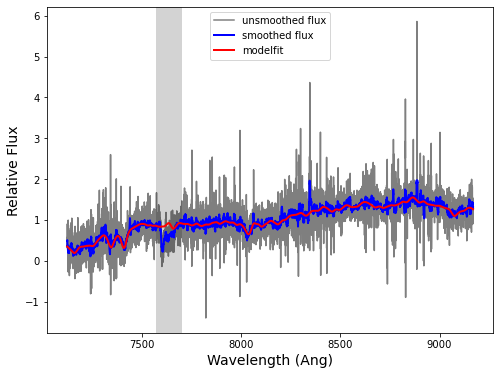

In [104]:
plt.figure(figsize=(8,6))
boxsize=15
x = np.exp(spec.wav_rebinned)*1.866
ll, rr = np.min(x), np.max(x)
gal_rebinn = spec1d.Spec1d(wav=x, flux=spec.flux_rebinned, verbose=False)
gal_smooth, varsmooth = gal_rebinn.smooth_boxcar(boxsize, verbose=False)
bst = fit_data[0] #spec.best_fit[0]
goodpixels = np.trim_zeros(fit_data[1], 'b').astype('int')#spec.goodpixels[0]
plt.xlabel(r"Wavelength (Ang)", fontsize=14)
plt.ylabel("Relative Flux", fontsize=14)
plt.plot(x, gal_rebinn['flux'], color='k', label='unsmoothed flux', alpha=0.5)
plt.plot(x, gal_smooth, color='b', linewidth=2, label='smoothed flux')
plt.plot(x, bst, 'r', linewidth=2, label='modelfit')
w = np.flatnonzero(np.diff(goodpixels) > 1)
for wj in w:
    a, b = goodpixels[wj : wj + 2]
    print(x[a], x[b])
    plt.axvspan(x[a], x[b], facecolor='lightgray')
    #plt.plot(x[a : b + 1], resid[a : b + 1], 'b')
    
# If the span is two thin than the function doesn't plot it visbly. So increased the span manually.
#plt.axvspan(5570, 5580, facecolor='lightgray')
plt.legend()

In [115]:
# source redshift 2.15 and Einstein radius 2.48 arcsecond
spec.cal_sis_veldis(2.48, 0.866, 2.15)


velocity dispersion assuming SIS mass profile is 437.225409


<Quantity 437.22540913>

## Check what is velocity dispersion if the rest wavelength region from 4200-4800 Ang and 5090-5450 Ang are used as Matt suggested.

In [105]:
spec_new = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True)


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  5811.95
 Spectrum End:    10075.69
 Dispersion (1st pixel):   0.22
 Dispersion (average):      0.29



In [106]:
spec_new.closest_wavelength(np.array([[4200, 4800], [5090, 5450]])*1.866)


Given waverange(assumed) : 

7837.200000000001 8956.800000000001
9497.94 10169.7

Closest waverange to the given ones : 

7837.1922437868425 8956.905660770612
9498.040126111917 10075.694708758103


([(7837.1922437868425, 8956.905660770612),
  (9498.040126111917, 10075.694708758103)],
 [(7869, 11384), (12928, 14482)])

In [107]:
spec1 = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7868, 11385])


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  7836.89
 Spectrum End:     8956.91
 Dispersion (1st pixel):   0.30
 Dispersion (average):      0.32




Line        lambda_rest  lambda_obs
----------  -----------  -----------
G-band        4305.00       8033.13
H-gamma       4340.00       8098.44
Fe4383        4383.00       8178.68
Ca4455        4455.00       8313.03
Fe4531        4531.00       8454.85



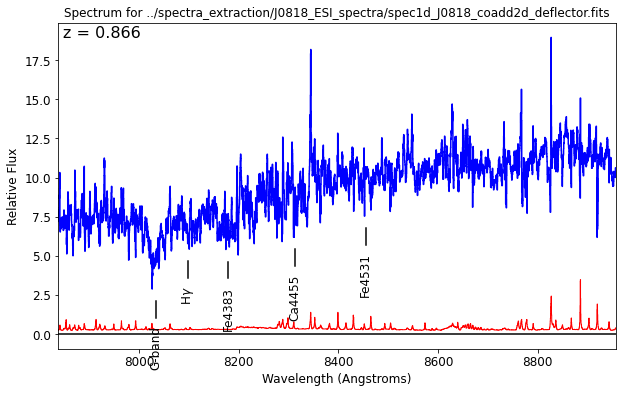

In [109]:
fg = plt.figure(figsize=(10,6))
spec1.smooth(7, fig=fg)
spec1.mark_lines('abs', z=0.866, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389921 km/s


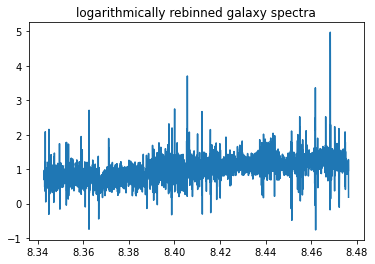

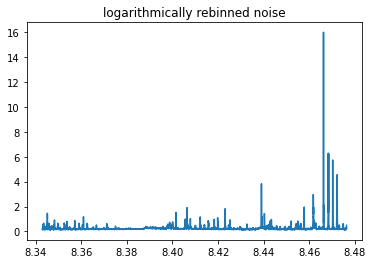

In [111]:
spec1.cal_parm(z=0.866, high_z=True, logscale=True, veldis_start=200, noise_scale=0.2)

In [112]:
temp_spec1 = spec1.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.3)


'sig_ins' is red shifted.

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -57659.955941 

sigma_diff : 0.989778



degree : 2
 Best Fit:       Vel     sigma
 comp.  0:        95       351
chi2/DOF: 1.131; degree = 2; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  17 / 1267

degree : 3
 Best Fit:       Vel     sigma
 comp.  0:        93       343
chi2/DOF: 1.131; degree = 3; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  16 / 1267

degree : 4
 Best Fit:       Vel     sigma
 comp.  0:        92       348
chi2/DOF: 1.131; degree = 4; mdegree = 0
method = capfit; Jac calls: 4; Func calls: 14; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  13 / 1267

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:        85       339
chi2/DOF: 1.130; degree = 5; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%):  12 / 1267

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:       

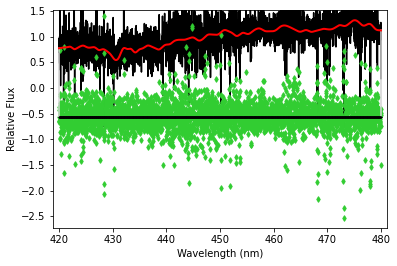

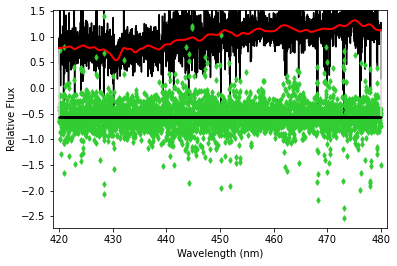

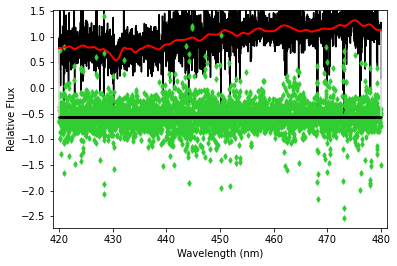

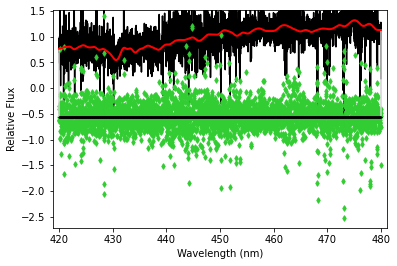

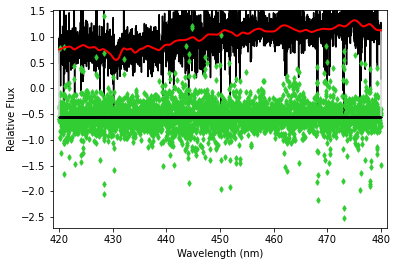

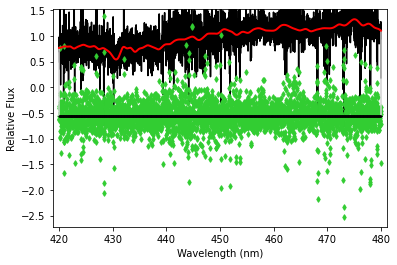

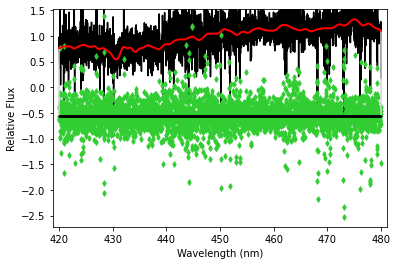

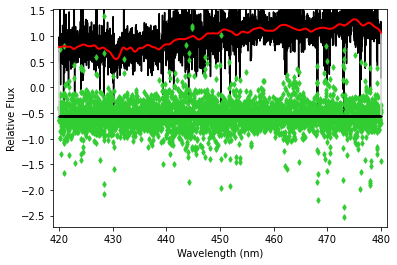

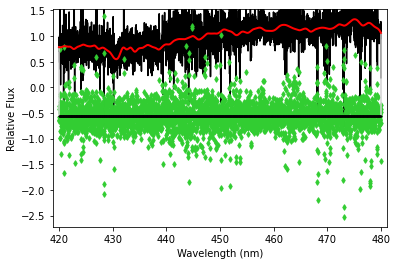

<Figure size 432x288 with 0 Axes>

In [113]:
spec1.cal_veldis(temp_spec=temp_spec1, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)

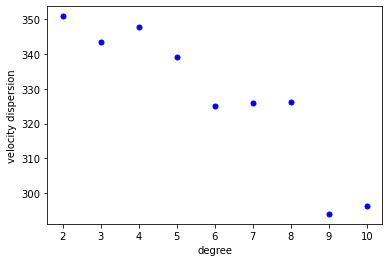

In [114]:
spec1.plot_veldis()

In [108]:
spec2 = Veldis('../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits', 
              informat='fits', logwav=True, trimsec=[12927, 14483])


Reading spectrum from ../spectra_extraction/J0818_ESI_spectra/spec1d_J0818_coadd2d_deflector.fits
Expected file format: fits
 Spectrum Start:  9497.68
 Spectrum End:    10075.69
 Dispersion (1st pixel):   0.36
 Dispersion (average):      0.37




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       9658.42



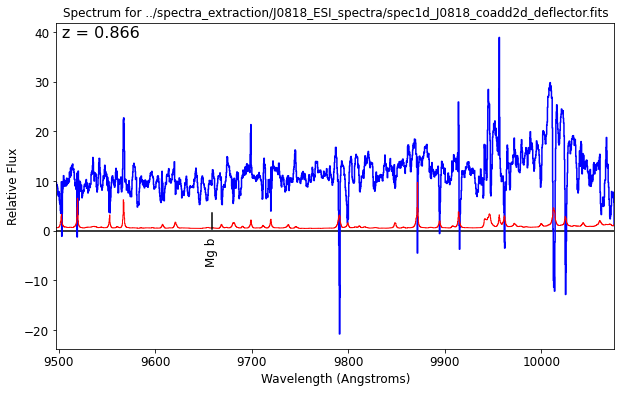

In [110]:
fg = plt.figure(figsize=(10,6))
spec2.smooth(7, fig=fg)
spec2.mark_lines('abs', z=0.866, usesmooth=True)

In [ ]:
spec2.cal_parm(z=0.558, high_z=True, logscale=True, veldis_start=200, noise_scale=0.2)

In [ ]:
temp_spec2 = spec2.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=1.6)

In [ ]:
spec2.cal_veldis(temp_spec=temp_spec1, degree=[2, 11], mask_reg=mask_reg, show_weight=True, moments=2)